In [3]:
import csv
import os
import random
import pickle
import gc
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import warnings
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.exceptions import ConvergenceWarning

# Select the best rsMRI modality based on train performance

In [4]:
rs_modalities = [
# RS TS
# Full corr
'aparc_Tian_s1_full_correlation', 
'aparc_2009_Tian_s1_full_correlation',
'glasser_Tian_s1_full_correlation',
'glasser_Tian_s4_full_correlation',
'Schaefer7n200p_tian_s1_full_correlation',
'Schaefer7n500p_Tian_s4_full_correlation',

# Partial corr
'aparc_Tian_s1_partial_correlation', 
'aparc_2009_Tian_s1_partial_correlation',
'glasser_Tian_s1_partial_correlation',
'glasser_Tian_s4_partial_correlation',
'Schaefer7n200p_tian_s1_partial_correlation',
'Schaefer7n500p_Tian_s4_partial_correlation',

# Tangent
'aparc_Tian_s1',
'aparc_2009_Tian_s1',
'glasser_Tian_s1',
'glasser_Tian_s4',
'Schaefer7n200p_tian_s1',
'Schaefer7n500p_tian_s4',

# RS IDP
'full_correlation_21', 'full_correlation_55',
'partial_correlation_21', 'partial_correlation_55',
'tangent_matrices_21', 'tangent_matrices_55']

In [ ]:
performance_list = []
folds = ["1", "2", "3", "4"]
for fold in folds:
    for modality in rs_modalities:
        with open(f'/PLS/brain/rs/parcellations/fold_{fold}/{modality}_model_fold_{fold}.pkl', "rb") as mo:
            model = pickle.load(mo)
            
        perf = {
            'Fold': fold,
            'Modality': modality,
            'n_components': model.best_params_,
            'Mean_test_scores': model.cv_results_['mean_test_score'],
            'Best_score': model.cv_results_['mean_test_score'].max()
            }
        # mean_test_score in cv_results corresponds to performance in the training set!
        
        performance_list.append(perf)

performance = pd.DataFrame(performance_list)

In [6]:
with pd.option_context('display.max_rows', None):
    display(performance)

,Fold,Modality,n_components,Mean_test_scores,Best_score
0,1,aparc_Tian_s1_full_correlation,{'n_components': 6},"[-0.6642821964659301, -0.6626360951150664, -0....",-0.656655
1,1,aparc_2009_Tian_s1_full_correlation,{'n_components': 5},"[-0.6643795090696205, -0.6626203177939274, -0....",-0.658323
2,1,glasser_Tian_s1_full_correlation,{'n_components': 4},"[-0.6644630600412191, -0.66115876909995, -0.65...",-0.657570
3,1,glasser_Tian_s4_full_correlation,{'n_components': 4},"[-0.6644554822290458, -0.6616318669949289, -0....",-0.658593
4,1,Schaefer7n200p_tian_s1_full_correlation,{'n_components': 5},"[-0.6630337675075533, -0.6603761663309438, -0....",-0.654217
5,1,Schaefer7n500p_Tian_s4_full_correlation,{'n_components': 4},"[-0.6639676736555034, -0.6607899783519653, -0....",-0.656847
6,1,aparc_Tian_s1_partial_correlation,{'n_components': 1},"[-0.6744598641211885, -0.691479217295004, -0.7...",-0.674460
7,1,aparc_2009_Tian_s1_partial_correlation,{'n_components': 1},"[-0.7080578284619911, -0.745794714431151, -0.7...",-0.708058
8,1,glasser_Tian_s1_partial_correlation,{'n_components': 1},"[-0.7357043871062083, -0.7893755349038931, -0....",-0.735704
9,1,glasser_Tian_s4_partial_correlation,{'n_components': 1},"[-0.7322532991311314, -0.7865762565119027, -0....",-0.732253


In [ ]:
performance_mean = performance[['Modality', 'Best_score']] #the less negative the better
performance_mean.groupby(['Modality']).mean().round(3).sort_values(by='Best_score', ascending=False)

,Best_score
Modality,
tangent_matrices_55,-0.603
Schaefer7n200p_tian_s1_full_correlation,-0.606
partial_correlation_55,-0.607
Schaefer7n500p_Tian_s4_full_correlation,-0.609
glasser_Tian_s1_full_correlation,-0.610
tangent_matrices_21,-0.611
glasser_Tian_s4_full_correlation,-0.611
aparc_2009_Tian_s1_full_correlation,-0.611
aparc_Tian_s1,-0.611


Text(0, 0.5, 'Mean Test Score')

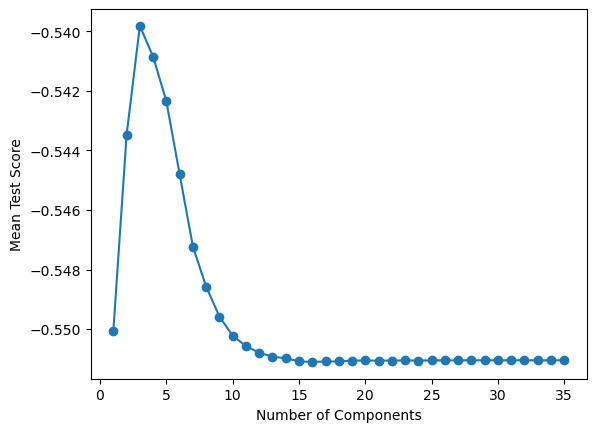

In [8]:
# Performance plot for one of the models
n_components = model.cv_results_['param_n_components'].data
mean_test_scores = model.cv_results_['mean_test_score']
plt.plot(n_components, mean_test_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Test Score')